<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_579_clockhands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 579 ClockHands
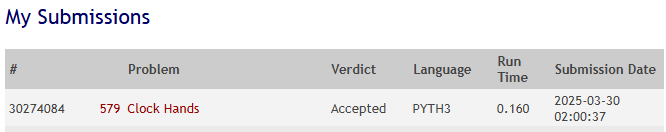

**@PDF: [UVA 488 Triangle Wave](https://onlinejudge.org/external/4/488.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

The medieval interest in mechanical contrivances is well illustrated by the development of the mechanical clock, the oldest of which is driven by weights and controlled by a verge, an oscillating arm engaging with a gear wheel. It dates back to 1386.

Clocks driven by springs had appeared by the mid-15th century, making it possible to construct more compact mechanisms and preparing the way for the portable clock.

English spring-driven pendulum clocks were first commonly kept on a small wall bracket and later on a shelf. Many bracket clocks contained a drawer to hold the winding key. The earliest bracket clocks, made for a period after 1660, were of architectural design, with pillars at the sides and a pediment on top.

In 17th- and 18th-century France, the table clock became an object of monumental design, the best examples of which are minor works of sculpture.

The longcase clocks (also called grandfather clocks) are tall pendulum clock enclosed in a wooden case that stands upon the floor and is typically from 6 to 7.5 feet (1.8 to 2.3 m) in height. Later, the name "grandfather clock" became popular after the popular song "My Grandfather's Clock," written in 1876 by Henry Clay Work.

One of the first atomic clocks was an ammonia-controlled clock. It was built in 1949 at the National Bureau of Standards, Washington, D.C.; in this clock the frequency did not vary by more than one part in $10^{8}$.

Nuclear clocks are built using two clocks. The aggregate of atoms that emit the gamma radiation of precise frequency may be called the emitter clock; the group of atoms that absorb this radiation is the absorber clock. One pair of these nuclear clocks can detect energy changes of one part in $10^{14}$, being about 1,000 times more sensitive than the best atomic clock.

The cesium clock is the most accurate type of clock yet developed. This device makes use of transitions between the spin states of the cesium nucleus and produces a frequency which is so regular that it has been adopted for establishing the time standard.

The history of clocks is fascinating, but unrelated to this problem. In this problem, you are asked to find the angle between the minute hand and the hour hand on a regular analog clock. Assume that the second hand, if there were one, would be pointing straight up at the 12. Give all angles as the smallest positive angles. For example 9:00 is 90 degrees; not -90 or 270 degrees.

## Input

The input is a list of times in the form H:M', each on their own line, with $1 \le H \le 12$ and $00 \le M \le 59$. The input is terminated with the time '0:00'. Note that H may be represented with 1 or 2 digits (for 1-9 or 10-12, respectively); M is always represented with 2 digits (the input times are what you typically see on a digital clock).

## Output

The output displays the smallest positive angle in degrees between the hands for each time. The answer should between 0 degrees and 180 degrees for all input times. Display each angle on a line by itself in the same order as the input. The output should be rounded to the nearest 1/1000, i.e., three places after the decimal point should be printed.

## Sample Input

12:00\
9:00\
8:10\
0:00


## Sample Output

0.000\
90.000\
175.000  

In [ ]:
import sys
import math

# --- Problem Description ---
# Problem: UVA 579 - ClockHands
# Input: Time in H:M format (1 <= H <= 12, 0 <= M <= 59). Terminates with 0:00.
# Output: Smallest positive angle between the hour and minute hands in degrees,
#         rounded to 3 decimal places. Angle should be between 0 and 180 degrees.

# --- Data Structures and Algorithms (DSA) Comments ---
#
# Data Structures Used:
#   - String: To read the input time "H:M".
#   - Float: Crucial for calculations involving angles and fractional movements
#            of the hour hand to maintain precision. Standard integers would lead
#            to inaccuracies.
#
# Algorithm: Clock Angle Calculation
#   The core idea is to determine the precise angular position of both the hour
#   and minute hands relative to a fixed point (usually the 12 o'clock position)
#   and then find the smallest angle between them.
#
#   1. Input Parsing:
#      - Read the time string (e.g., "8:10").
#      - Split the string by the ':' delimiter.
#      - Convert the hour (H) and minute (M) parts to floating-point numbers.
#
#   2. Minute Hand Angle Calculation:
#      - A clock face represents 360 degrees.
#      - The minute hand completes a full 360-degree rotation in 60 minutes.
#      - Speed of minute hand = 360 degrees / 60 minutes = 6 degrees per minute.
#      - Angular position (relative to 12) = `M * 6.0` degrees.
#
#   3. Hour Hand Angle Calculation:
#      - The hour hand completes a full 360-degree rotation in 12 hours (720 minutes).
#      - Speed of hour hand = 360 degrees / 12 hours = 30 degrees per hour.
#      - Speed of hour hand = 30 degrees / 60 minutes = 0.5 degrees per minute.
#      - The hour hand's position is affected by both the hour and the minutes (it moves continuously).
#      - Formula: `hour_angle = (H % 12 + M / 60.0) * 30.0`
#         - `H % 12`: This correctly maps the hour to a 0-11 range relative to the 12 o'clock position
#           (e.g., 12 maps to 0, 1 maps to 1, ..., 11 maps to 11). This gives the base hour mark.
#         - `M / 60.0`: This calculates the fraction of the current hour that has passed based on the minutes.
#           This fraction determines how far the hour hand has moved *past* the last hour mark.
#         - `(H % 12 + M / 60.0)`: This gives the effective hour value (e.g., 8:30 is 8.5 hours past 12).
#         - `* 30.0`: Multiplies the effective hour by the number of degrees per hour mark (360/12 = 30).
#
#   4. Angle Difference Calculation:
#      - Calculate the absolute difference between the hour and minute hand angles:
#        `diff = abs(hour_angle - minute_angle)`
#
#   5. Smallest Angle Determination:
#      - The angle between two hands on a circle can be measured in two ways (clockwise or counter-clockwise).
#        We need the smaller of these two angles[cite: 19, 24].
#      - The two possible angles are `diff` and `360.0 - diff`.
#      - The smallest angle = `min(diff, 360.0 - diff)`. This ensures the result is <= 180 degrees.
#
#   6. Output Formatting:
#      - Print the calculated `smallest_angle` formatted to exactly three decimal places[cite: 26].
#        Python's f-strings or `format()` method are suitable for this.
#
# Time Complexity:
#   - O(1) for each time input. The calculations (parsing, angle computations, difference, min)
#     take constant time regardless of the input time values.
#   - The overall time complexity is linear in the number of time inputs read until termination.
#
# Space Complexity:
#   - O(1) auxiliary space per time input. Only a few variables are needed to store H, M, angles, and the result.

# --- Main Loop ---
while True:
    # Read a line of input (H:M format or "0:00").
    line = sys.stdin.readline().strip()

    # Termination condition for the input loop.
    if line == "0:00":
        break

    # Parse the input string into hours (H) and minutes (M).
    try:
        H_str, M_str = line.split(':')
        # Convert to float for precise calculations.
        H = float(H_str)
        M = float(M_str)
    except (ValueError, IndexError):
        # Handle potential errors if the input line is not in the expected "H:M" format.
        continue # Skip this invalid line and proceed to the next.

    # --- Angle Calculation Logic ---

    # Calculate the angle of the minute hand from the 12 o'clock position.
    # 6 degrees per minute (360 degrees / 60 minutes).
    minute_angle = M * 6.0

    # Calculate the angle of the hour hand from the 12 o'clock position.
    # 30 degrees per hour (360 degrees / 12 hours).
    # The position includes fractional movement based on minutes.
    # (H % 12) ensures 12 o'clock is treated as 0 for the base calculation.
    hour_angle = (H % 12 + M / 60.0) * 30.0

    # Calculate the absolute difference between the two hand angles.
    angle_diff = math.fabs(hour_angle - minute_angle)

    # Find the smallest positive angle between the hands (must be <= 180).
    # The angle can be measured directly or the 'reflex' way around the circle.
    smallest_angle = min(angle_diff, 360.0 - angle_diff)

    # Print the result formatted to 3 decimal places.
    print(f"{smallest_angle:.3f}")